In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r'C:\Users\ASUS\Downloads\AirBNB-1.csv')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4156\3178535731.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\ASUS\Downloads\AirBNB-1.csv')


In [3]:
df.head(5)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [4]:
df.shape

(74111, 11)

In [5]:
df.describe()

,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,7.411100e+04,74108.000000,73908.000000,57389.000000,74019.000000,73980.000000,74111.000000
mean,1.126662e+07,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069
std,6.081735e+06,2.153603,0.582054,7.836556,0.852149,1.254142,0.717394
min,3.440000e+02,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,6.261964e+06,2.000000,1.000000,92.000000,1.000000,1.000000,4.317488
50%,1.225415e+07,2.000000,1.000000,96.000000,1.000000,1.000000,4.709530
75%,1.640226e+07,4.000000,1.000000,100.000000,1.000000,2.000000,5.220356
max,2.123090e+07,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


In [6]:
df.isnull().sum()

id                          0
room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

In [7]:
df = df.drop(columns=['review_scores_rating'])

In [8]:
df.head(5)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,0.0,1.0,4.744932


In [9]:
df['bathrooms'] = df.bathrooms.fillna(df['bathrooms'].mean())

In [10]:
df.isna().sum()

id                       0
room_type                5
accommodates             3
bathrooms                0
cancellation_policy      8
cleaning_fee             4
instant_bookable         0
bedrooms                92
beds                   131
log_price                0
dtype: int64

In [11]:
df['bedrooms'] = df.bedrooms.fillna(df['bedrooms'].mean())

In [12]:
df['bedrooms'].isna().sum()

0

In [13]:
df['beds'] = df.bathrooms.fillna(df['beds'].mean())

In [14]:
df.beds.mean()

1.2352722303404233

In [15]:
df.isna().sum()

id                     0
room_type              5
accommodates           3
bathrooms              0
cancellation_policy    8
cleaning_fee           4
instant_bookable       0
bedrooms               0
beds                   0
log_price              0
dtype: int64

In [16]:
df['accommodates'] = df.accommodates.fillna(df['accommodates'].mean())

In [17]:
df = df.dropna()

In [18]:
df.isna().sum()

id                     0
room_type              0
accommodates           0
bathrooms              0
cancellation_policy    0
cleaning_fee           0
instant_bookable       0
bedrooms               0
beds                   0
log_price              0
dtype: int64

In [19]:
df.head(5)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,3.0,1.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,1.0,1.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,2.0,1.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,0.0,1.0,4.744932


In [20]:
df = df.drop(columns = 'id')

In [22]:
df.columns

Index(['room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'bedrooms', 'beds', 'log_price'],
      dtype='object')

In [23]:
df_dummies =pd.get_dummies(df, prefix =['RT', 'CP', 'CF', 'IB'], columns = ['room_type', 'cancellation_policy', 'cleaning_fee','instant_bookable' ] )

In [24]:
df_dummies.head()

,accommodates,bathrooms,bedrooms,beds,log_price,RT_Entire home/apt,RT_Private room,RT_Shared room,CP_flexible,CP_moderate,CP_strict,CF_False,CF_True,IB_f,IB_t
0,3.0,1.0,1.0,1.0,5.010635,1,0,0,0,0,1,0,1,1,0
1,7.0,1.0,3.0,1.0,5.129899,1,0,0,0,0,1,0,1,0,1
2,5.0,1.0,1.0,1.0,4.976734,1,0,0,0,1,0,0,1,0,1
3,4.0,1.0,2.0,1.0,6.620073,1,0,0,1,0,0,0,1,1,0
4,2.0,1.0,0.0,1.0,4.744932,1,0,0,0,1,0,0,1,0,1


In [25]:
df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [26]:
hotencoder = OneHotEncoder()
encoded =  hotencoder.fit_transform(df.room_type.values.reshape(-1,1)).toarray()
print(encoded)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [27]:
def ConvOHE(elem, category):
    if elem == category:
        return 1
    else:
        return 0
    
for cat in df.room_type.unique():
    df[f'RT_{cat}'] = df.room_type.apply(ConvOHE, category = cat)

In [28]:
df[df.room_type.isna()]

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,bedrooms,beds,log_price,RT_Entire home/apt,RT_Private room,RT_Shared room


In [29]:
df_dummies.describe()

,accommodates,bathrooms,bedrooms,beds,log_price,RT_Entire home/apt,RT_Private room,RT_Shared room,CP_flexible,CP_moderate,CP_strict,CF_False,CF_True,IB_f,IB_t
count,74098.000000,74098.000000,74098.000000,74098.000000,74098.000000,74098.000000,74098.000000,74098.000000,74098.000000,74098.000000,74098.000000,74098.000000,74098.000000,74098.000000,74098.000000
mean,3.155227,1.235284,1.265857,1.235284,4.782059,0.557397,0.413412,0.029191,0.304219,0.257200,0.438581,0.265932,0.734068,0.737537,0.262463
std,2.153685,0.581283,0.851659,0.581283,0.717414,0.496698,0.492449,0.168343,0.460079,0.437093,0.496217,0.441831,0.441831,0.439976,0.439976
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,4.317488,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,4.709530,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,4.000000,1.000000,1.000000,1.000000,5.220356,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,16.000000,8.000000,10.000000,8.000000,7.600402,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df_dummies.corr()

,accommodates,bathrooms,bedrooms,beds,log_price,RT_Entire home/apt,RT_Private room,RT_Shared room,CP_flexible,CP_moderate,CP_strict,CF_False,CF_True,IB_f,IB_t
accommodates,1.000000,0.505176,0.709129,0.505176,0.567627,0.481276,-0.454841,-0.089477,-0.171494,-0.041494,0.195555,-0.182302,0.182302,-0.053141,0.053141
bathrooms,0.505176,1.000000,0.589661,1.000000,0.355076,0.139851,-0.151697,0.031124,-0.054556,-0.053541,0.097745,-0.053670,0.053670,-0.001397,0.001397
bedrooms,0.709129,0.589661,1.000000,0.589661,0.473069,0.253394,-0.237076,-0.054131,-0.093668,-0.048626,0.129678,-0.105323,0.105323,0.003659,-0.003659
beds,0.505176,1.000000,0.589661,1.000000,0.355076,0.139851,-0.151697,0.031124,-0.054556,-0.053541,0.097745,-0.053670,0.053670,-0.001397,0.001397
log_price,0.567627,0.355076,0.473069,0.355076,1.000000,0.602553,-0.531692,-0.222498,-0.095873,-0.050029,0.132959,-0.111201,0.111201,0.044287,-0.044287
RT_Entire home/apt,0.481276,0.139851,0.253394,0.139851,0.602553,1.000000,-0.942107,-0.194596,-0.164348,-0.003535,0.155493,-0.209980,0.209980,0.023792,-0.023792
RT_Private room,-0.454841,-0.151697,-0.237076,-0.151697,-0.531692,-0.942107,1.000000,-0.145574,0.147957,0.013931,-0.149453,0.183273,-0.183273,-0.016816,0.016816
RT_Shared room,-0.089477,0.031124,-0.054131,0.031124,-0.222498,-0.194596,-0.145574,1.000000,0.052096,-0.030322,-0.021593,0.083427,-0.083427,-0.021008,0.021008
CP_flexible,-0.171494,-0.054556,-0.093668,-0.054556,-0.095873,-0.164348,0.147957,0.052096,1.000000,-0.389095,-0.584438,0.354554,-0.354554,0.003230,-0.003230
CP_moderate,-0.041494,-0.053541,-0.048626,-0.053541,-0.050029,-0.003535,0.013931,-0.030322,-0.389095,1.000000,-0.520093,-0.090367,0.090367,0.019511,-0.019511


Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'log_price',
       'RT_Entire home/apt', 'RT_Private room', 'RT_Shared room',
       'CP_flexible', 'CP_moderate', 'CP_strict', 'CF_False', 'CF_True',
       'IB_f', 'IB_t'],
      dtype='object')

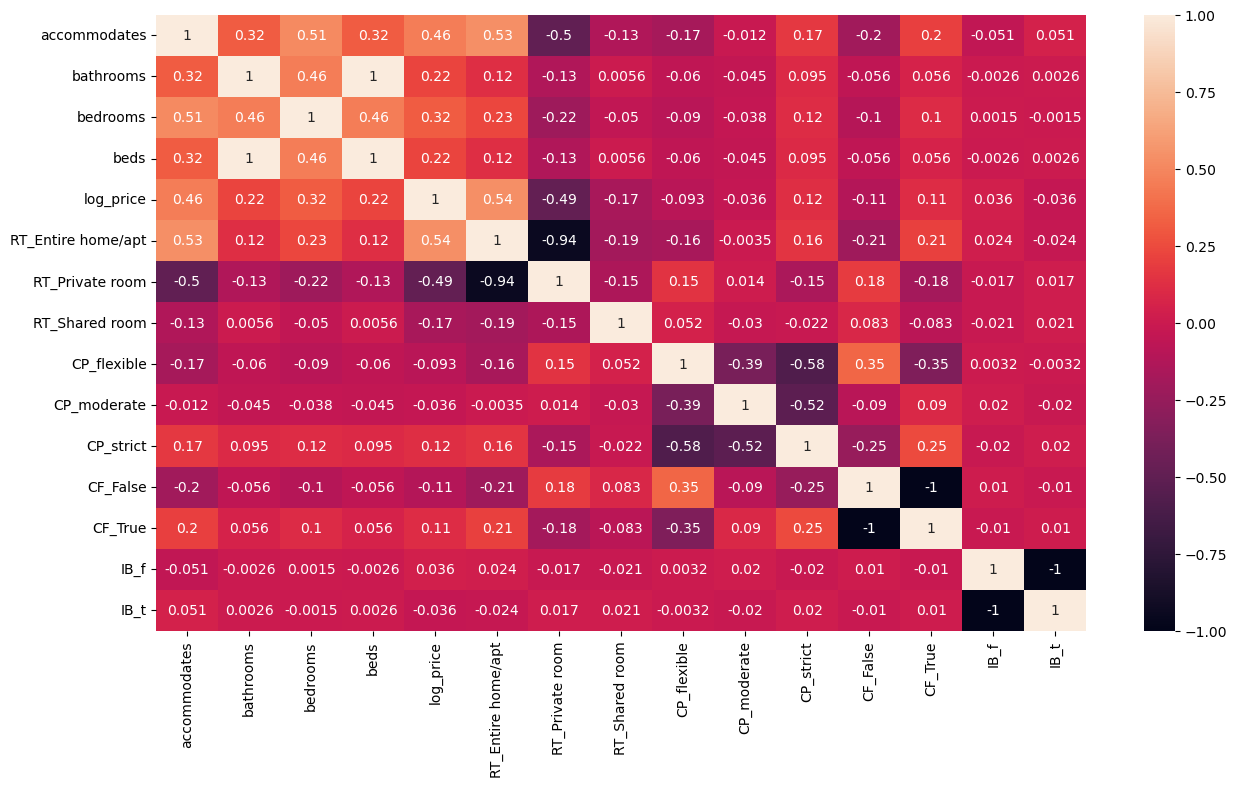

In [31]:
corr = df_dummies.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df_dummies.columns

In [32]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74098 entries, 0 to 74110
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   accommodates        74098 non-null  float64
 1   bathrooms           74098 non-null  float64
 2   bedrooms            74098 non-null  float64
 3   beds                74098 non-null  float64
 4   log_price           74098 non-null  float64
 5   RT_Entire home/apt  74098 non-null  uint8  
 6   RT_Private room     74098 non-null  uint8  
 7   RT_Shared room      74098 non-null  uint8  
 8   CP_flexible         74098 non-null  uint8  
 9   CP_moderate         74098 non-null  uint8  
 10  CP_strict           74098 non-null  uint8  
 11  CF_False            74098 non-null  uint8  
 12  CF_True             74098 non-null  uint8  
 13  IB_f                74098 non-null  uint8  
 14  IB_t                74098 non-null  uint8  
dtypes: float64(5), uint8(10)
memory usage: 4.1 MB


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
x = df_dummies.drop(['log_price'], axis=1)
y = df_dummies['log_price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)
x_train.head()
y_train.head()

4031     3.555348
891      5.521461
15573    4.691348
63820    4.615121
20054    5.023881
Name: log_price, dtype: float64

In [35]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5095407725272296

In [36]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.5280362106169338